**Základné fyzikálne praktikum I**, Jozef Hanč, PF UPJŠ v Košiciach  
<font size=2> Kópiu tohto notebooku nájdete v [Google učebni](classroom.google.com) v priečinku **Študijné materiály, ťaháky, kontakty**  
Postupne pomocou klávesov `Shift+Enter` vykonajte jednotlivé bloky dokumentu. </font>
***
# <font color=brown> Pojem pravdepodobnosti - Monte Carlo simulácie </font>

Náhodné experimenty vykonávané na počítači boli vymyslené fyzikmi v tajnom projekte Manhattan, čo bol krycí názov pre projekt vývoja atómovej bomby. Tieto experimenty fyzici nazvali *Monte Carlo simulácie* (skr. MC simulácie)
podľa slávneho kasína Monte Carlo v Monacu. Viac ste sa mohli dozvedieť v texte [Neistoty, pravdepodobnosť a kasíno Monte Carlo](https://docs.google.com/document/d/1_PXdo3by5z5rYFxaKW5msWbhrt3mB_lUYVisYbH_31I/preview).

### Hod mincou - Geogebra
- Znak (Z), Písmo (P)
- simuláciu ovládate tlačidlami `hod` - hodiť si, `odznova` - spustiť hádzanie mincou odznova
- na začiatku vždy kliknite `odznova`
- posúvaním hnedého bodu možno merať hodnoty pravdepodobnosti v grafe
- simulácia priamo na Geogebra stránke (https://ggbm.at/vg47yz5n)

In [1]:
# stlačením SHIFT+Enter sprístupnite Geogebra simuláciu v Jupyteri 
from IPython.display import IFrame
url="https://www.geogebra.org/material/iframe/id/vg47yz5n"
IFrame(url, 900,450)

### Hod N mincami naraz - Python
- pomocou `Shift+Enter` vykonávate jednotlivé bloky príkazov
- pomocou `Ctrl+Enter` vykonávate daný blok príkazov opakovane
- v druhom bloku meníte len $N = 10^2, 10^3, 10^4, 10^5, 10^6$ hodov

<font size=2>**Pozn.** V Pythone možno zadať napr. 1000 mincí v skrátenom tvare $\,\verb|10**3|\,$, kde 2 znaky násobenia ** (2 hviezdičky z numerickej klávesnice)   
znamenajú umocnenie, t.j. $\,\verb|**3|\,$ znamená umocnenie na tretiu. </font>

In [2]:
# načítanie knižnice príkazov nazývanej numerický python - numpy, ktorá vie robiť MC simulácie
# knižnici numpy sme dali skrátené meno np
import numpy as np

# hod N mincami naraz: 0-písmo, 1 - znak
N = 10
hody = np.random.randint(0,2, size = N)
rel_pocetnosti = np.bincount(hody)/N*100

# zobrazenie percentuálnych pocetnosti a vygenerovaných hodov (až 1000)
print(rel_pocetnosti)
print(hody[:1000])

[30. 70.]
[1 0 1 1 0 1 1 1 0 1]


,hod,relatívna početnosť
0,P,30.0
1,Z,70.0


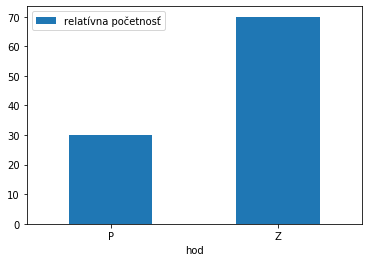

In [4]:
# načítanie knižnice pandas, ktorá vie zobrazovať tabuľky aj základné grafy
import pandas as pd

# číselná a grafická sumarizácia vo forme tabuľky a grafu
tabulka =  pd.DataFrame({'hod':['P','Z'], 'relatívna početnosť':rel_pocetnosti})
display(tabulka)
stlpcovygraf = tabulka.plot.bar(x='hod', y='relatívna početnosť', rot=0)

# <font color=brown> Vysvetlivky príkazov v Pythone </font>

### **Príkazy**  `np.random.randint(0,2,size = N)` a `np.bincount(hody)/N*100`
- $\verb|np|$ - vyberám príkaz z knižnice numpy
- $\verb|random|$ - idem do časti knižnice numpy, ktorá vie robiť náhodné pokusy (*ang. random = náhodný*)
- $\verb|randint|$ - týmto príkazom budem generovať náhodné čísla s rovnakou pravdepodobnoťou  
  a budú to celé čísla (*randint je skratka ang. random integer - náhodné celé čísla*).  
```
parametre príkazu (0,2, size = N) - náhodné celé čísla budú väčšie rovné ako 0 a menšie ako 2, t.j. 0,1 a bude ich N
```
- celý príkaz je tak vlastne generovanie čísel 0 a 1 s rovnakou pravdepodobnosťou,  
  čo je to isté ako hod ideálnou mincou, kde napr. 0 reprezentuje znak a 1 písmo alebo naopak.
  
- $\verb|bincount|$ zráta početnosti jednotlivých hodnôt v danej pamäti, u nás `hody`
- $\verb|/N*100|$ prepočíta početnosti na percentá, tzv. relatívne početnosti

### **Príkaz**  `pd.DataFrame({'hod':['P','Z'], 'relatívna početnosť':rel_pocetnosti})`
- $\verb|pd|$ - vyberám príkaz z knižnice pandas
- $\verb|DataFrame|$ - týmto príkazom vytváram tabuľky v tvare `{'názov 1. stĺpca': [zoznam hodnôt], 'názov 2. stĺpca': [zoznam hodnôt]}`  
(*ang. DataFrame = tabuľka dát*)

### **Príkaz** `tabulka.plot.bar(x='hod', y='početnosť', rot=0)`
- $\verb|plot.bar|$ - týmto príkazom budem z tabuľky kresliť stĺpcový graf 
```
parametre príkazu (x='hod', y='početnosť', rot=0) - na osi x bude stĺpec hod z tabuľky a na osi y stĺpec počestnosť, pričom popisky na osi nebudú nijako otočené (rot = 0)
```
- celý príkaz je tak vlastne vykreslenie stĺcového grafu na základe zadanej tabuľky